In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
sys.path.append('..')
import telemetry
from scipy import signal
%matplotlib inline

telemetry data from https://github.com/shahar603/SpaceX

https://www.reddit.com/r/spacex/comments/75brdt/iridium3_telemetry/?st=j8ks7nq4&sh=23be39a1

In [38]:
data = telemetry.parse('Iridium3data.json')
t = []
v = []
alt = []

for entry in data:
    t.append(entry['time'])
    v.append(entry['velocity'])
    alt.append(entry['altitude'])
    
data = pd.DataFrame({'t'   : t[0 : : 30],
                     'v'   : v[0 : : 30],
                     'alt' : alt[0 : : 30]})

data = data[data['t'] > 0.1]



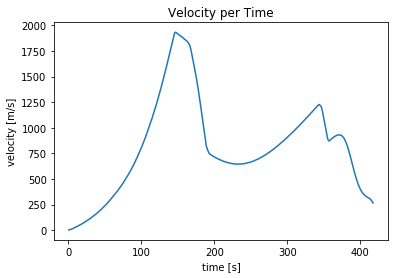

In [39]:
plt.plot(data['t'].values, data['v'].values)
plt.xlabel('time [s]')
plt.ylabel('velocity [m/s]')
plt.title('Velocity per Time')
plt.show()

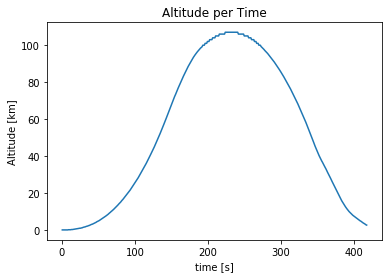

In [40]:
plt.plot(data['t'].values, data['alt'].values)
plt.xlabel('time [s]')
plt.ylabel('Altitude [km]')
plt.title('Altitude per Time')
plt.show()

In [41]:
a = np.diff(data['v'].values) / np.diff(data['t'].values) # acceleration

c:\users\jan\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in sqrt
  This is separate from the ipykernel package so we can avoid doing imports until


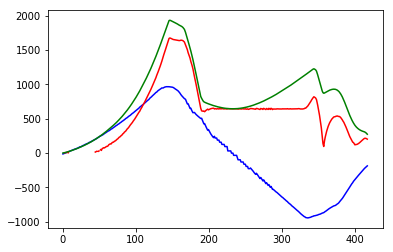

In [75]:
v_y  = np.diff(data['alt'].values * 1000) / np.diff(data['t'].values)
v_y = signal.savgol_filter(v_y, 31, 1)
v_x = np.sqrt(data['v'].values[0 : -1] ** 2 - v_y ** 2)
plt.plot(data['t'].values[0 : -1], v_y, 'b')
plt.plot(data['t'].values[0 : -1], v_x, 'r')
plt.plot(data['t'].values[0 : -1], data['v'].values[0 : -1], 'g')
plt.show()

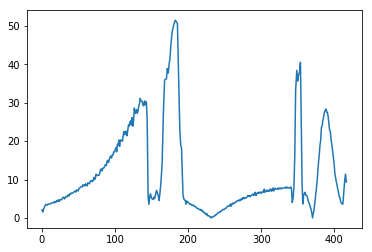

In [76]:
plt.plot(data['t'].values[0 : -1], np.abs(a))
plt.show()